# **Importing Libraries**

In [3]:
import numpy as np #for numerical operations

import pandas as pd  #for data manipulation helps ine data cleaning

import matplotlib.pyplot as plt # for plotting  visualizations

import seaborn as sns

# **Importing Data file**

In [4]:
df=pd.read_csv("/content/Customer_Segmentation_data.csv")

In [5]:
#to understand about data structure we use head

df.head()

,customer_id,Name,age,gender,phone_number,customer_location,purchase_date,product_category,purchase_amount,preferred_payment_method,loyality_score
0,1,Heddi Franzewitch,45,NaN,602-122-2212,Vizag,27.10.2021,Books,85149.0,credit card,38
1,2,Elva McIlmurray,17,NaN,935-456-3692,Guntur,16.2.2022,Electronics,38171.0,CAsh,51
2,3,Hobard Jaan,20,Male,208-197-1165,NaN,18.9.2023,Groceries,15315.0,CAsh,3
3,4,Rozanna Birdsall,44,femal,572-520-0369,Vijayawada,3.9.2023,Grocy,43680.0,credit card,88
4,5,Jermaine Wicken,20,NaN,571-488-3899,Vijayawada,12.6.2021,electronics,87037.0,mobile payment,41


In [6]:
#to get the column names

df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'phone_number',
       'customer_location', 'purchase_date', 'product_category',
       'purchase_amount', 'preferred_payment_method', 'loyality_score'],
      dtype='object')

# **Data Cleaning**

In [7]:
#checking for missing values and their count

df.isnull().sum()

,0
customer_id,0
Name,0
age,0
gender,189
phone_number,0
customer_location,34
purchase_date,0
product_category,45
purchase_amount,63
preferred_payment_method,0


In [8]:
#checking categorical columns for any misspellings,unexpected values for that we use unique


df['gender'].unique()

array([nan, 'Male', 'femal', 'Female', 'MAle', 'FEmale'], dtype=object)

In [10]:
#using replace to that misspellings column values

df['gender']=df['gender'].replace({
    'femal':'Female',
    'MAle':'Male',
    'FEmale':'Female'
})


#capitalization of each value
df['gender'] = df['gender'].str.capitalize()


In [11]:
df['gender'].unique()

array([nan, 'Male', 'Female'], dtype=object)

In [12]:
#filling remaining missing(NAN) values with Unknown

df['gender']=df['gender'].fillna('Unknown')

In [13]:
#checking for any categorical inconsistency(lower case ,upper case characters)  of location names using unique
#(we get unique values of that particular column)
df['customer_location'].unique()

array(['Vizag', 'Guntur', nan, 'Vijayawada', 'Chittor', 'Kurnool',
       'KUrnool', 'VIJayawada'], dtype=object)

In [14]:
#using replace for that categorical inconsistency

df['customer_location']=df['customer_location'].replace({
    'KUrnool':'Kurnool',
    'VIJayawada':'Vijayawada'
})

In [15]:
df['customer_location']=df['customer_location'].fillna('Unkown')

In [16]:
#capitalization of each value

df['customer_location']=df['customer_location'].str.capitalize()

In [17]:
df.isnull().sum()

,0
customer_id,0
Name,0
age,0
gender,0
phone_number,0
customer_location,0
purchase_date,0
product_category,45
purchase_amount,63
preferred_payment_method,0


In [18]:
df['product_category'].unique()

array(['Books', 'Electronics', 'Groceries', 'Grocy', 'electronics',
       'Clothing', 'Toys', 'Home Appliances', nan, 'books'], dtype=object)

In [19]:
#here also some categorical inconsistencies using replace

df['product_category']=df['product_category'].replace(
    {
        'books':'Books',
        'Grocy':'Groceries',
        'electronics':'Electronics'
    })


In [20]:
df['product_category']=df['product_category'].fillna('Unkown')

In [21]:
#filling numeric column with missing values with mean
df['purchase_amount']=df['purchase_amount'].fillna(df['purchase_amount'].mean())

In [22]:
df.isnull().sum()

,0
customer_id,0
Name,0
age,0
gender,0
phone_number,0
customer_location,0
purchase_date,0
product_category,0
purchase_amount,0
preferred_payment_method,0


In [23]:
df['preferred_payment_method'].unique()

array(['credit card', 'CAsh', 'mobile payment', 'cash'], dtype=object)

In [24]:
#here identified some categorical inconsistencies in this preferred_payment_method

df['preferred_payment_method']=df['preferred_payment_method'].replace({
    'CAsh':'Cash'
})

In [25]:
df['preferred_payment_method']=df['preferred_payment_method'].str.capitalize()

In [26]:
df['preferred_payment_method'].unique()

array(['Credit card', 'Cash', 'Mobile payment'], dtype=object)

In [27]:
#last check for all categorical columns thar are unique or not

for col in ['gender', 'customer_location', 'product_category', 'preferred_payment_method']:
    print(col, df[col].unique())


gender ['Unknown' 'Male' 'Female']
customer_location ['Vizag' 'Guntur' 'Unkown' 'Vijayawada' 'Chittor' 'Kurnool']
product_category ['Books' 'Electronics' 'Groceries' 'Clothing' 'Toys' 'Home Appliances'
 'Unkown']
preferred_payment_method ['Credit card' 'Cash' 'Mobile payment']


In [28]:
#download cleaned data

df.to_csv('cleaned_data.csv', index=False)


# **EDA(Exploratory Data Analysis)**

In [29]:
#Visualizing distributions, summary statistics, and patterns comes under EDA tasks

#summary statistics

df.describe()


,customer_id,age,purchase_amount,loyality_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,37.686000,54156.122732,50.377000
std,288.819436,13.334812,25430.747473,28.793297
min,1.000000,15.000000,10008.000000,1.000000
25%,250.750000,26.000000,32259.750000,25.000000
50%,500.500000,38.000000,54156.122732,51.000000
75%,750.250000,49.000000,75296.500000,75.000000
max,1000.000000,60.000000,99825.000000,100.000000


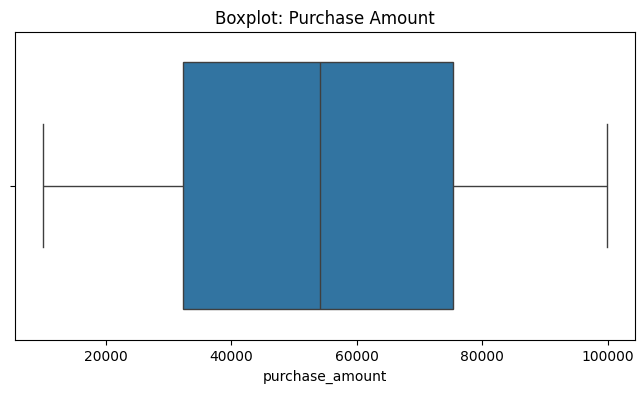

In [30]:
#checking outliers for purchase_amount
plt.figure(figsize=(8,4))
sns.boxplot(x=df['purchase_amount'])
plt.title('Boxplot: Purchase Amount')
plt.show()

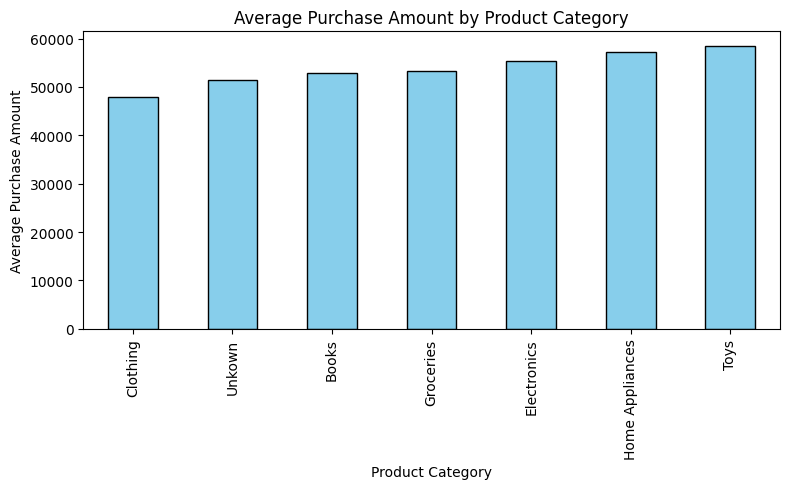

In [31]:
#Bar Plot Visualization

import matplotlib.pyplot as plt

avg_amount = df.groupby('product_category')['purchase_amount'].mean().sort_values()

plt.figure(figsize=(8,5))
avg_amount.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Product Category')
plt.tight_layout()
plt.show()


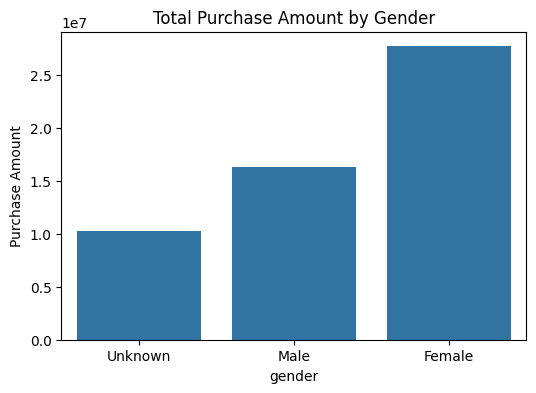

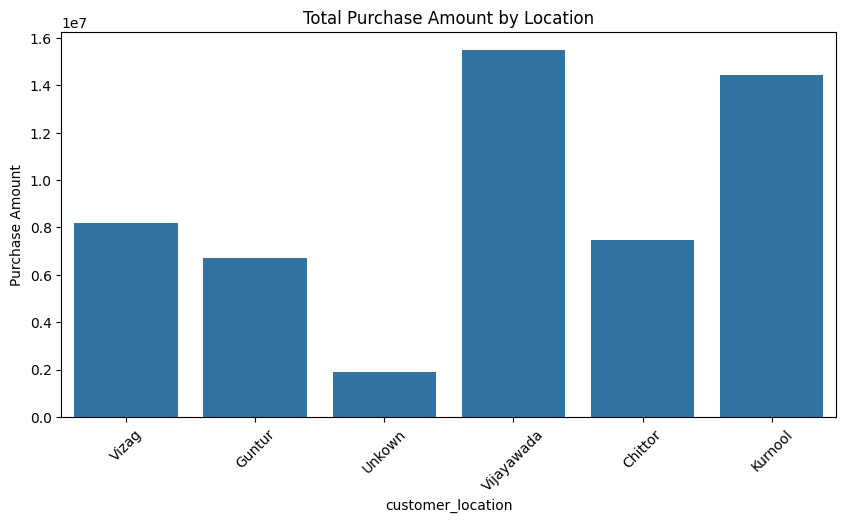

In [36]:

#  data
df2 = pd.read_csv("/content/Cleaned_Customer_Segementation_Data.csv")


# 1. Segment by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='purchase_amount', data=df2, estimator=sum, errorbar=None)
plt.title('Total Purchase Amount by Gender')
plt.ylabel('Purchase Amount')
plt.show()


# 2. Segment by Customer Location

plt.figure(figsize=(10,5))
sns.barplot(x='customer_location', y='purchase_amount', data=df2, estimator=sum, errorbar=None)
plt.title('Total Purchase Amount by Location')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.show()



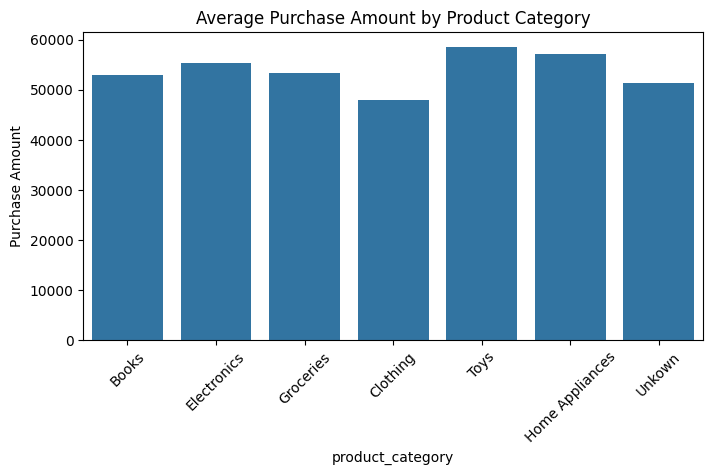

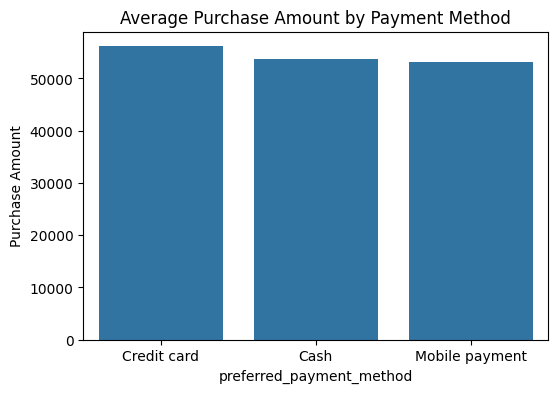

In [37]:

# 3. Segment by Product Category

plt.figure(figsize=(8,4))
sns.barplot(x='product_category', y='purchase_amount', data=df2, estimator='mean', errorbar=None)
plt.title('Average Purchase Amount by Product Category')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.show()


# 4. Segment by Preferred Payment Method

plt.figure(figsize=(6,4))
sns.barplot(x='preferred_payment_method', y='purchase_amount', data=df2, estimator='mean', errorbar=None)
plt.title('Average Purchase Amount by Payment Method')
plt.ylabel('Purchase Amount')
plt.show()




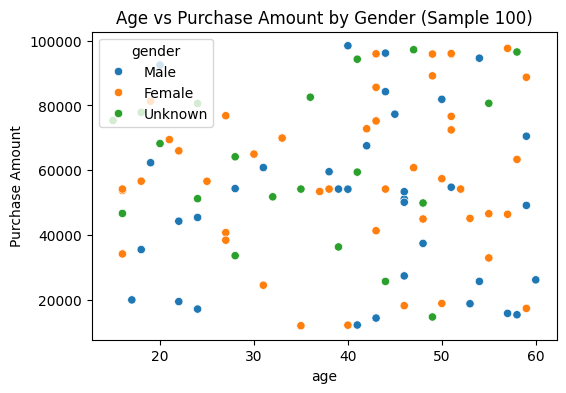

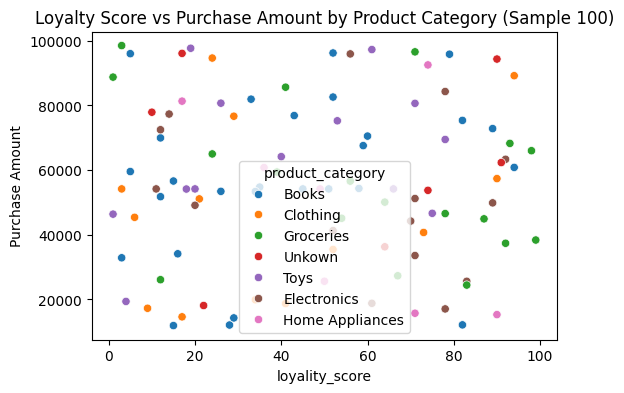

In [41]:

# 5. Age vs Purchase Amount (Scatter)

sample_df = df2.sample(n=100, random_state=42)

plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='purchase_amount', hue='gender', data=sample_df)
plt.title('Age vs Purchase Amount by Gender (Sample 100)')
plt.ylabel('Purchase Amount')
plt.show()


# 6. Loyalty Score vs Purchase Amount

sample_df1 = df2.sample(n=100, random_state=42)

plt.figure(figsize=(6,4))
sns.scatterplot(x='loyality_score', y='purchase_amount', hue='product_category', data=sample_df1)
plt.title('Loyalty Score vs Purchase Amount by Product Category (Sample 100)')
plt.ylabel('Purchase Amount')
plt.show()




# **Feature Engineering**

In [42]:
df1=pd.read_csv("/content/Cleaned_Customer_Segementation_Data.csv")

In [43]:
df1.head()

,customer_id,Name,age,gender,phone_number,customer_location,purchase_date,product_category,purchase_amount,preferred_payment_method,loyality_score
0,1,Heddi Franzewitch,45,Unknown,602-122-2212,Vizag,27.10.2021,Books,85149,Credit card,38
1,2,Elva McIlmurray,17,Unknown,935-456-3692,Guntur,16.2.2022,Electronics,38171,Cash,51
2,3,Hobard Jaan,20,Male,208-197-1165,Unkown,18.9.2023,Groceries,15315,Cash,3
3,4,Rozanna Birdsall,44,Female,572-520-0369,Vijayawada,3.9.2023,Groceries,43680,Credit card,88
4,5,Jermaine Wicken,20,Unknown,571-488-3899,Vijayawada,12.6.2021,Electronics,87037,Mobile payment,41


In [44]:
df1['purchase_year'] = pd.to_datetime(df1['purchase_date'], format='%d.%m.%Y').dt.year


In [45]:
df1['purchase_year'].head()

,purchase_year
0,2021
1,2022
2,2023
3,2023
4,2021


In [46]:
#adding one new column

profit_margin = 0.10  # 10%
df1['estimated_profit'] = df1['purchase_amount'] * profit_margin


In [47]:
df1.to_csv('data.csv', index=False)


In [48]:
df1.head()

,customer_id,Name,age,gender,phone_number,customer_location,purchase_date,product_category,purchase_amount,preferred_payment_method,loyality_score,purchase_year,estimated_profit
0,1,Heddi Franzewitch,45,Unknown,602-122-2212,Vizag,27.10.2021,Books,85149,Credit card,38,2021,8514.9
1,2,Elva McIlmurray,17,Unknown,935-456-3692,Guntur,16.2.2022,Electronics,38171,Cash,51,2022,3817.1
2,3,Hobard Jaan,20,Male,208-197-1165,Unkown,18.9.2023,Groceries,15315,Cash,3,2023,1531.5
3,4,Rozanna Birdsall,44,Female,572-520-0369,Vijayawada,3.9.2023,Groceries,43680,Credit card,88,2023,4368.0
4,5,Jermaine Wicken,20,Unknown,571-488-3899,Vijayawada,12.6.2021,Electronics,87037,Mobile payment,41,2021,8703.7


# **Group By in Pandas**

In [50]:
#total amount per category

df1.groupby('product_category')['purchase_amount'].sum()

,purchase_amount
product_category,
Books,10955901
Clothing,4272009
Electronics,10965887
Groceries,11996832
Home Appliances,6741782
Toys,6911602
Unkown,2312102


In [51]:
#average amount per category

df1.groupby('product_category')['purchase_amount'].mean()

,purchase_amount
product_category,
Books,52927.057971
Clothing,48000.101124
Electronics,55383.267677
Groceries,53319.253333
Home Appliances,57133.745763
Toys,58572.898305
Unkown,51380.044444


In [52]:
#count of purchases for each category

df1.groupby('product_category')['purchase_amount'].count()

,purchase_amount
product_category,
Books,207
Clothing,89
Electronics,198
Groceries,225
Home Appliances,118
Toys,118
Unkown,45


# **K-Means Clustering**

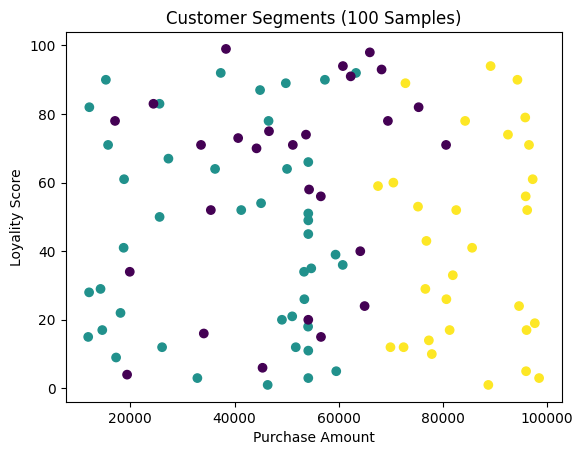

In [61]:
# Imporing libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#  100 random samples from df1
df_sample = df1.sample(n=100, random_state=42)

# Choose numeric features for clustering
features = ['purchase_amount', 'age', 'loyality_score', 'estimated_profit']
data = df_sample[features]

#Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#  Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters
df_sample['cluster'] = kmeans.fit_predict(data_scaled)

#  Visualize clusters (using 2 features)
plt.scatter(df_sample['purchase_amount'], df_sample['loyality_score'], c=df_sample['cluster'], cmap='viridis')
plt.xlabel('Purchase Amount')
plt.ylabel('Loyality Score')
plt.title('Customer Segments (100 Samples)')
plt.show()
